In [19]:
import gym
from time import sleep
from IPython.display import clear_output, display
import matplotlib.pyplot as plt
from statistics import mean
import importlib
import optical_network_game.game_gym
importlib.reload(optical_network_game.game_gym)
from optical_network_game.game_gym import *
from stable_baselines3.common.env_checker import check_env
from stable_baselines3 import DQN
from stable_baselines3.common import results_plotter
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.results_plotter import load_results, ts2xy, plot_results
from stable_baselines3.common.callbacks import BaseCallback
from stable_baselines3.common.evaluation import evaluate_policy

In [20]:
class SaveOnBestTrainingRewardCallback(BaseCallback):
    """
    Callback for saving a model (the check is done every ``check_freq`` steps)
    based on the training reward (in practice, we recommend using ``EvalCallback``).

    :param check_freq:
    :param log_dir: Path to the folder where the model will be saved.
      It must contains the file created by the ``Monitor`` wrapper.
    :param verbose: Verbosity level.
    """
    def __init__(self, check_freq: int, log_dir: str, verbose: int = 1):
        super(SaveOnBestTrainingRewardCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.log_dir = log_dir
        self.save_path = os.path.join(log_dir, 'best_model')
        self.best_mean_reward = -np.inf

    def _init_callback(self) -> None:
        # Create folder if needed
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self) -> bool:
        if self.n_calls % self.check_freq == 0:

          # Retrieve training reward
          x, y = ts2xy(load_results(self.log_dir), 'timesteps')
          if len(x) > 0:
              # Mean training reward over the last 100 episodes
              mean_reward = np.mean(y[-100:])
              if self.verbose > 0:
                print(f"Num timesteps: {self.num_timesteps}")
                print(f"Best mean reward: {self.best_mean_reward:.2f} - Last mean reward per episode: {mean_reward:.2f}")

              # New best model, you could save the agent here
              if mean_reward > self.best_mean_reward:
                  self.best_mean_reward = mean_reward
                  # Example for saving best model
                  if self.verbose > 0:
                    print(f"Saving new best model to {self.save_path}")
                  self.model.save(self.save_path)

        return True

In [21]:
class TensorboardCallback(BaseCallback):
    """
    Custom callback for plotting additional values in tensorboard.
    """

    def __init__(self, verbose=0):
        super(TensorboardCallback, self).__init__(verbose)
        # self.cum_bp = []
    
    def _on_step(self) -> bool:
        block_ep = self.locals["infos"][0].get('bp')
        self.logger.record('blocking_ratio', block_ep)
        return True

    # def _on_rollout_end(self) -> None:
    #     self.logger.record('blocking_ratio', mean(self.cum_bp))

    #     # reset
    #     self.cum_bp = []
    #     pass
        

In [22]:
import os
# Create log dir
log_dir = os.path.join(os.getcwd(), "tmp/")
os.makedirs(log_dir, exist_ok=True)

In [23]:
# Create the callback: check every 1000 steps
callback = SaveOnBestTrainingRewardCallback(check_freq=200000, log_dir=log_dir)
tensor_callback = TensorboardCallback()

# create model

nodeList, linkList = createTestTopology()
requestList = generateRequests(nodeList, 30)

user = User()
env = game_gym(nodeList, linkList, requestList, user)
eveon = Monitor(env, log_dir)

# check_env(eveon, warn=True)
model = DQN('MlpPolicy', eveon, verbose=1, buffer_size=100000, device='cuda', 
learning_starts=50000, exploration_fraction=0.5, learning_rate=0.0001,
gamma=0.8, tensorboard_log='./dqn_tensorboard/')



Using cuda device
Wrapping the env in a DummyVecEnv.


In [24]:
# train
model.learn(total_timesteps=500000, callback=[callback, tensor_callback])
model.save("DQNEveon20")

# %tensorboard --logdir ./dqn15_tensorboard/

Logging to ./dqn_tensorboard/DQN_29
Too many invalid actions.
0.13333333333333333
Total reward for this episode is -21980.000000000004
Too many invalid actions.
0.16666666666666666
Total reward for this episode is -40339.99999999991
Too many invalid actions.
0.6
Total reward for this episode is -272559.9999999855
Too many invalid actions.
0.13333333333333333
Total reward for this episode is -31180.000000000007
-----------------------------------
| blocking_ratio      | 0.133     |
| rollout/            |           |
|    ep_len_mean      | 1.79e+04  |
|    ep_rew_mean      | -9.15e+04 |
|    exploration_rate | 0.727     |
| time/               |           |
|    episodes         | 4         |
|    fps              | 1627      |
|    time_elapsed     | 44        |
|    total_timesteps  | 71727     |
| train/              |           |
|    learning_rate    | 0.0001    |
|    loss             | 0.0734    |
|    n_updates        | 5431      |
-----------------------------------
Too many i

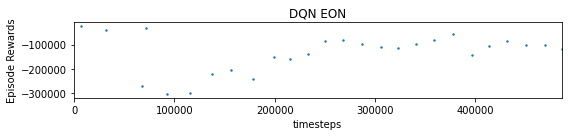

In [25]:
# Plot rewards
plot_results([log_dir], 500000, results_plotter.X_TIMESTEPS, "DQN EON")
plt.show()

In [26]:
# test
final_model = 'DQNEveon19'
best_model = 'tmp/best_model.zip'
model = DQN.load(final_model, env=env, device='cpu')

obs = env.reset()
while True :
    # clear_output(wait=True)
    action, states_ = model.predict(obs, deterministic=True )
    # action = 6
    obs, rewards, dones, info = env.step(action)
    # plt.imshow(obs)
    # plt.show()
    print(action)
    if dones == True:
        # print(env.reward)

        # with open('info.json', 'w') as outfile:
        #     json.dump(info, outfile)

        env.reset()

    env.render()

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
0
0
2
2
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
0
0
2
2
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
0
0
2
2
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
0
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
0
0
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
2
2
2
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
2
2
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
2
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
1
0
1
0
1
0
1
0
1
0
1
0
1

SystemExit: 

C:\Users\tkate\miniconda3\envs\project\lib\site-packages\IPython\core\interactiveshell.py:3259: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
